# Neural Network With One Hidden Layer
### Planar data classification 

###### Objective: We'll be implementing a neural network with one hidden layer to classify a planar dataset.
###### Result: Gives better practical intuition about the working of a neural network

#### Quick Overview:

 1. Define a Neural network structure
 2. Initialize the model parameters
 3. Loop:
           - Implement forword propogation algorithm 
           - Compute the loss
           - Implement back propogation algorithm
           - Update the parameters by implementing gradient descent

In [60]:
# Importing the required dependencies

# Fundamental package for scientific computing with python
import numpy as np 

# Visualize the dataset 
import matplotlib.pyplot as plt

# Scikit-learn provides a simple and efficient tools for data mining and data analysis 
import sklearn, sklearn.datasets

# planar_utils is used to reduce the size of the program; It provides various helpful functions
from planar_utils import plot_decision_boundary, sigmoid
from planar_utils import load_planar_dataset, load_extra_datasets

# To visualize the process 
from tqdm import tqdm

# Magic Commands
%matplotlib inline

In [61]:
#Loading the data
X, Y = load_planar_dataset()
colors = np.random.randint(0,1,400)

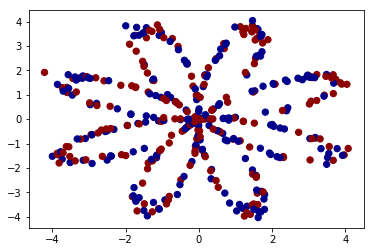

In [62]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :],c=['darkred','darkblue'] ,s=40);

In [63]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [64]:
def initialize_parameters(n_x, n_h, n_y):
    
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing the parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    W1 = np.random.randn(4,2) * 0.01
    b1 = np.zeros([4,1])
    W2 = np.random.randn(1,4) * 0.01
    b2 = np.zeros([1,1])
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [65]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing the parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Implementing forward propogation
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [66]:
def compute_cost(A2, Y, parameters):
    """
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing the parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost 
    """
    
    m = Y.shape[1] # number of example

    logprobs = np.multiply(np.log(A2),Y)
    cost = -1 * np.sum(logprobs)
    
    return cost

In [67]:
def backward_propagation(parameters, cache, X, Y):
    """
    Arguments: parameters, cache, X, Y
    parameters -- python dictionary containing the parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing the gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: To calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [68]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Arguments: parameters, grads, learning_rate (optional)
    parameters -- python dictionary containing the parameters 
    grads -- python dictionary containing the gradients 
    
    Returns:
    parameters -- python dictionary containing the updated parameters 
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    
    W1 -= learning_rate*dW1 
    b1 -= learning_rate*db1
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [69]:
def nn_model(X, Y, n_h, num_iterations = 10000):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for i in tqdm(range(0, num_iterations)):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2,Y,parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
    print('\nCost = ',cost)
        
    return parameters

In [70]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing the parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 
    predictions[predictions > 0.5] = 1
    predictions[predictions <= 0.5] = 0
    
    return predictions

In [71]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2714.98it/s]



Cost =  39.42728479252381


Text(0.5,1,'Decision Boundary for hidden layer size 4')

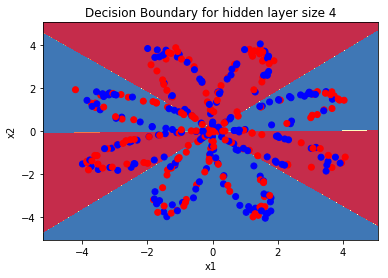

In [72]:
# Plot the decision boundary
c = ['red','blue']
plot_decision_boundary(lambda x: predict(parameters, x.T), X, c)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [73]:
# Analysing the accuracy of the model
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%
